In [1]:
#Importing Required Packages
import io
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import time
plt.style.use(style="seaborn")
%matplotlib inline


#Importing required data (Uploading files from the drive)

from google.colab import files
uploaded = files.upload()

In [2]:
df = pd.read_csv('indexProcessed.csv')
index = pd.read_csv('indexInfo.csv')


Statistical Analysis peformed in this project:

1.   New York Stock Exchange vs NASDAQ Stock Exchange (Trading Activities) Can be performed for other exchanges as well 
2.   Generating Scatter Plot And Correlation Matrix
3.   Generate Forecasting ARIMA model to predict 'Close prices'

In [3]:
df=df.merge(index, on='Index')

Data PreProcessing

In [4]:
#Summary Satistics
df.shape
df.describe
df.columns

Index(['Index', 'Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume',
       'CloseUSD', 'Region', 'Exchange', 'Currency'],
      dtype='object')

In [5]:
#Check for nulls
df.isnull().sum()

#Nonulls

Index        0
Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
CloseUSD     0
Region       0
Exchange     0
Currency     0
dtype: int64

In [6]:
# Casting Data Types
df['Date'] = pd.to_datetime(df['Date'])
df['Index'] = df['Index'].astype('category')
df['Region'] = df['Region'].astype('category')
df['Exchange'] = df['Exchange'].astype('category')
df['Currency'] = df['Currency'].astype('category')

In [7]:
#Generating subsets of data  for comparing (New York Stock Exchange) vs (NASDAQ Stock Exchange) 

#NYA  (New York Stock Exchange)
nya=df[df['Index']=='NYA'] 
nya=nya[nya['Date']>= '2010-01-01']
nya.sort_values(by=['Date'])
nya.reset_index(drop=True, inplace=True)


#IXIC (NASDAQ Stock Exchange)
nas=df[df['Index']=='IXIC'] 
nas=nas[nas['Date']>= '2010-01-01']
nas.sort_values(by=['Date'])
nas.reset_index(drop=True, inplace=True)

In [8]:
# Calculating Total Trading Activity

#NYA  (New York Stock Exchange)
nya['Total Traded']=nya['Volume']*nya['Open']


#IXIC (NASDAQ Stock Exchange)
nas['Total Traded']=nas['Volume']*nas['Open']


In [9]:
nya['Total Traded'].head(5)

0    2.867813e+13
1    1.825106e+13
2    3.657317e+13
3    3.888550e+13
4    3.245632e+13
Name: Total Traded, dtype: float64

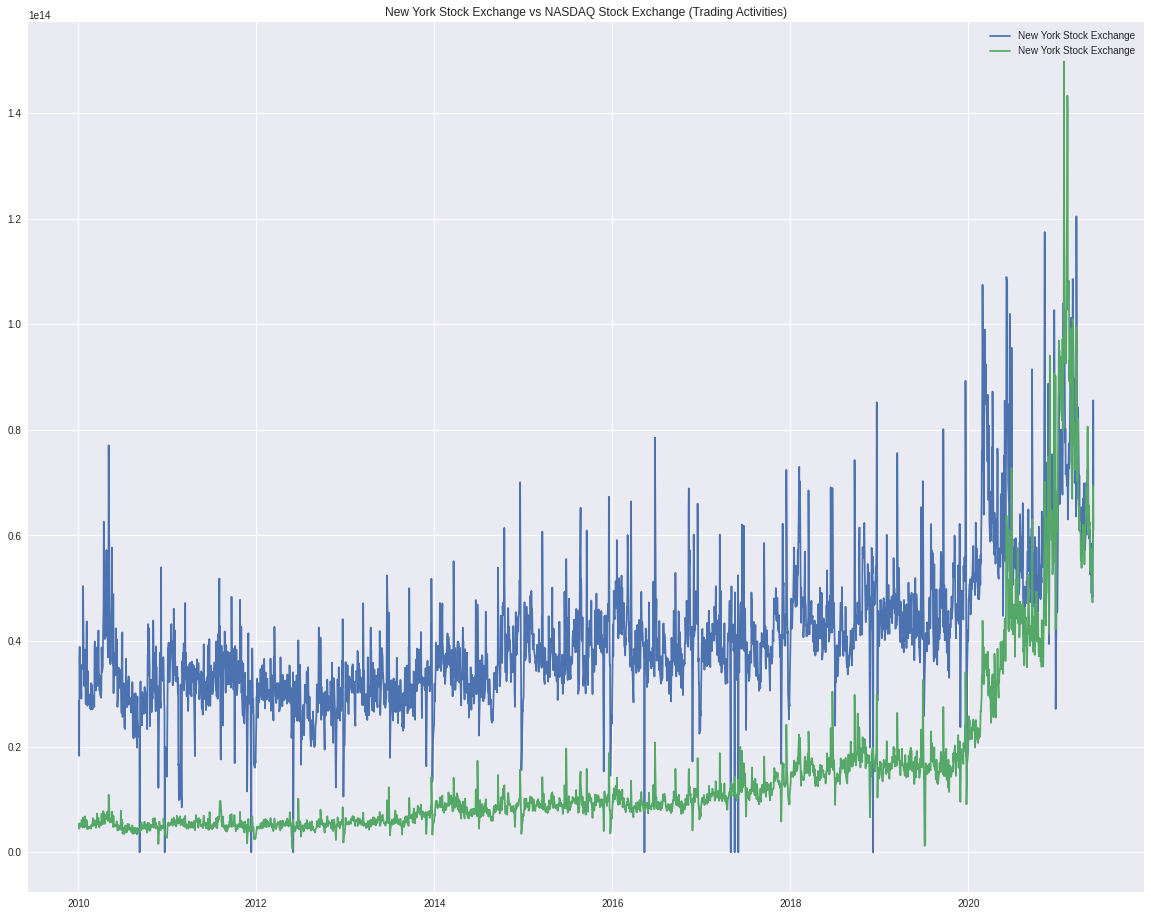

In [10]:
x=nya['Date']
y=nya['Total Traded']
y2=nas['Total Traded']
plt.figure(figsize=(20,16))
plt.plot(x,y,label='New York Stock Exchange')
plt.plot(x,y2,label='New York Stock Exchange')
plt.title('New York Stock Exchange vs NASDAQ Stock Exchange (Trading Activities)')
plt.legend()

In [11]:
# Getting The highest Trading volume for New York Stock Exchange
# nya['Total Traded'].argmax()
# Dtae : '2021-01-27	14867.37012'
nya.iloc[[nya['Total Traded'].argmax()]]

,Index,Date,Open,High,Low,Close,Adj Close,Volume,CloseUSD,Region,Exchange,Currency,Total Traded
2785,NYA,2021-01-27,14867.37012,14867.37012,14447.36035,14487.73047,14487.73047,9.878040e+09,14487.73047,United States,New York Stock Exchange,USD,1.468605e+14


In [12]:
# Getting The highest Trading volume for NASDAQ
# Date : '2021-01-27'
nas.iloc[[nas['Total Traded'].argmax()]]


,Index,Date,Open,High,Low,Close,Adj Close,Volume,CloseUSD,Region,Exchange,Currency,Total Traded
2785,IXIC,2021-01-27,13486.58008,13538.41992,13192.91016,13270.59961,13270.59961,1.110216e+10,13270.59961,United States,NASDAQ,USD,1.497302e+14


Using Moving average to make data more robust for comparison , because when we closely observe the data, there's high noise within the data

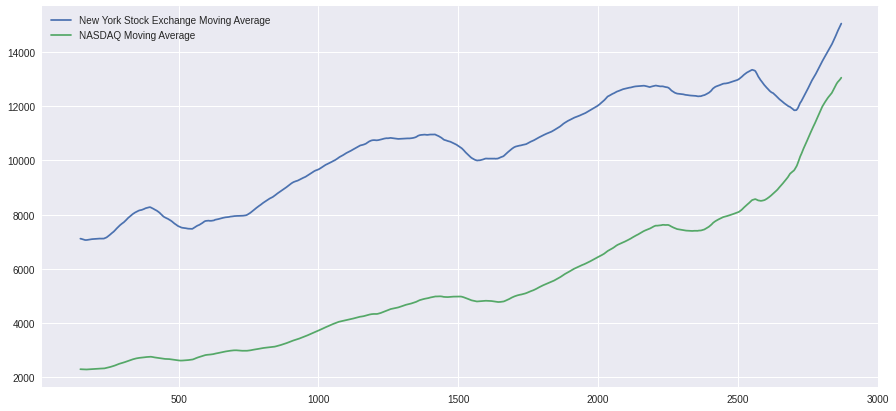

In [13]:
nya['MA50']=nya['CloseUSD'].rolling(150).mean()
nas['MA50']=nas['CloseUSD'].rolling(150).mean()
nya['MA50'].plot(label='New York Stock Exchange Moving Average',figsize=(15,7))
nas['MA50'].plot(label='NASDAQ Moving Average')


plt.legend()

#This can be caliberated for other Stock Exchanges as well
# the noise has been more or less compensated

# Generating Scatter Plot and a Heat Map 
-Correlation between stock exchanges throughout the world

In [14]:
stocks = pd.unique(df['Index'])
stock_dfs = []
for stock in stocks:
    stock_dfs.append(df[df['Index'] == stock])

In [15]:
#Generating subsets

#1.nya
nya=df[df['Index']=='NYA'] 
nya=nya[nya['Date']>= '2010-01-01']
nya.sort_values(by=['Date'])
nya.reset_index(drop=True, inplace=True)


#2.IXIC (NASDAQ Stock Exchange)
HSI=df[df['Index']=='HSI'] 
HSI=HSI[HSI['Date']>= '2010-01-01']
HSI.sort_values(by=['Date'])
HSI.reset_index(drop=True, inplace=True)


#3.N100
N100=df[df['Index']=='N100'] 
N100=N100[N100['Date']>= '2010-01-01']
N100.sort_values(by=['Date'])
N100.reset_index(drop=True, inplace=True)


#4.IXIC (NASDAQ Stock Exchange)
nas=df[df['Index']=='IXIC'] 
nas=nas[nas['Date']>= '2010-01-01']
nas.sort_values(by=['Date'])
nas.reset_index(drop=True, inplace=True)

#5.IXIC (NASDAQ Stock Exchange)
N225=df[df['Index']=='N225'] 
N225=N225[N225['Date']>= '2010-01-01']
N225.sort_values(by=['Date'])
N225.reset_index(drop=True, inplace=True)

#6.IXIC (NASDAQ Stock Exchange)
GSPTSE=df[df['Index']=='GSPTSE'] 
GSPTSE=GSPTSE[GSPTSE['Date']>= '2010-01-01']
GSPTSE.sort_values(by=['Date'])
GSPTSE.reset_index(drop=True, inplace=True)


#7.IXIC (NASDAQ Stock Exchange)
NSEI=df[df['Index']=='NSEI'] 
NSEI=NSEI[NSEI['Date']>= '2010-01-01']
NSEI.sort_values(by=['Date'])
NSEI.reset_index(drop=True, inplace=True)


#8.IXIC (NASDAQ Stock Exchange)
GDAXI=df[df['Index']=='GDAXI'] 
GDAXI=GDAXI[GDAXI['Date']>= '2010-01-01']
GDAXI.sort_values(by=['Date'])
GDAXI.reset_index(drop=True, inplace=True)

#SSMI
SSMI=df[df['Index']=='SSMI'] 
SSMI=SSMI[SSMI['Date']>= '2010-01-01']
SSMI.sort_values(by=['Date'])
SSMI.reset_index(drop=True, inplace=True)

#TWII
TWII=df[df['Index']=='TWII'] 
TWII=TWII[TWII['Date']>= '2010-01-01']
TWII.sort_values(by=['Date'])
TWII.reset_index(drop=True, inplace=True)


#JO
JO=df[df['Index']=='J203.JO'] 
JO=JO[JO['Date']>= '2010-01-01']
JO.sort_values(by=['Date'])
JO.reset_index(drop=True, inplace=True)

#399001.SZ
SZ=df[df['Index']=='399001.SZ'] 
SZ=SZ[SZ['Date']>= '2010-01-01']
JO.sort_values(by=['Date'])
SZ.reset_index(drop=True, inplace=True)

#SS
SS=df[df['Index']=='000001.SS'] 
SS=SS[SS['Date']>= '2010-01-01']
SS.reset_index(drop=True, inplace=True)









array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f983831a090>,
      dtype=object)

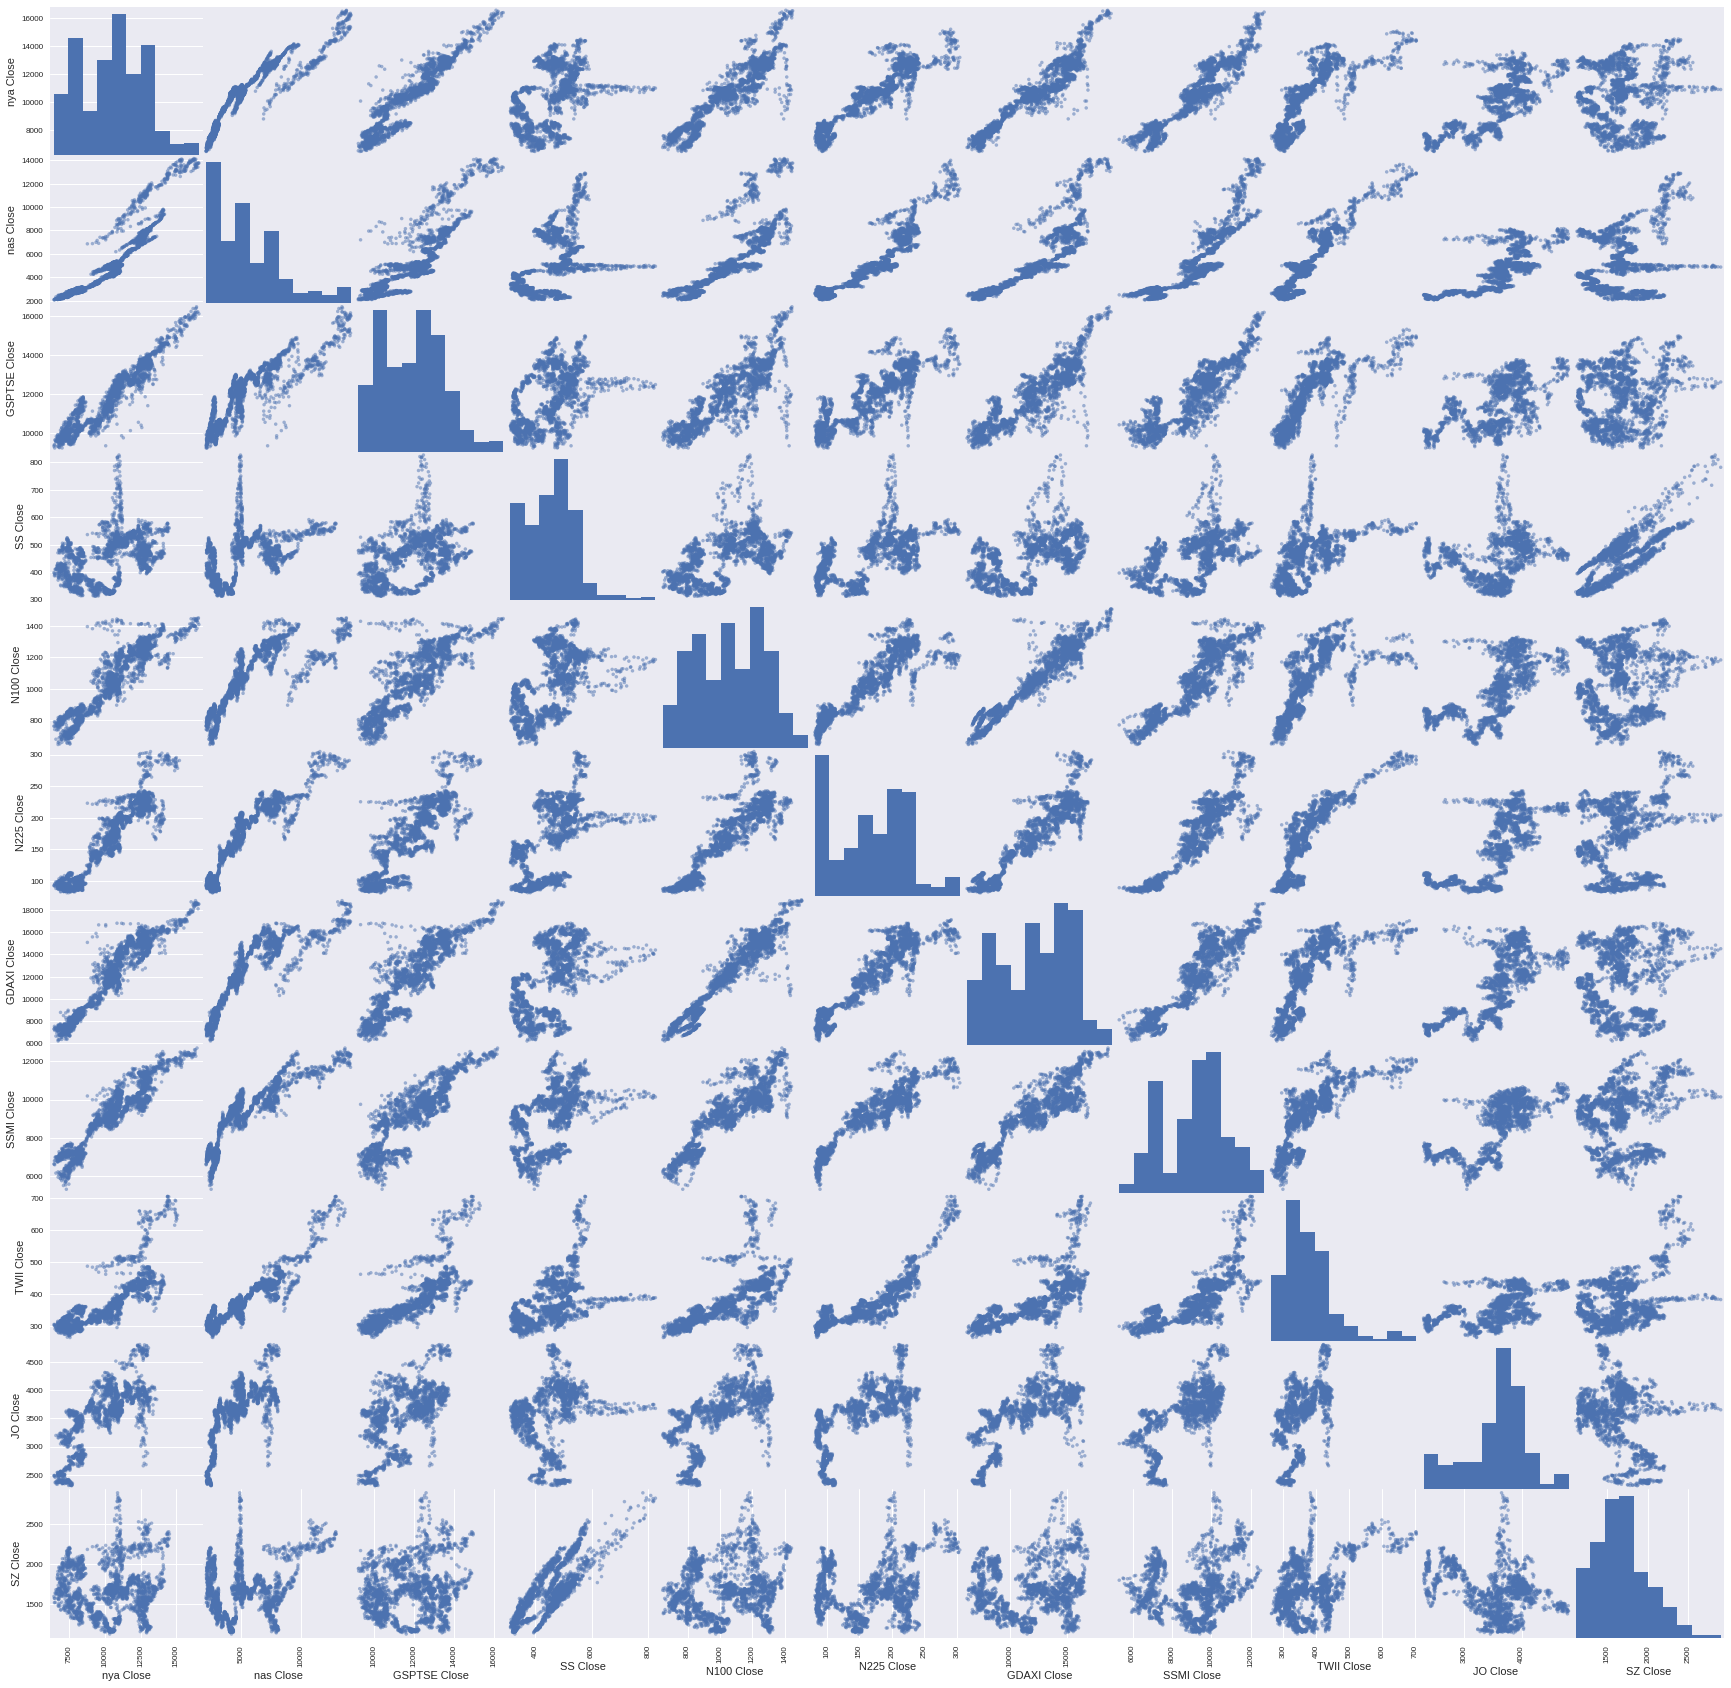

In [16]:
# Generating Scatter Matrix

from pandas.plotting import scatter_matrix
stock_comp=pd.concat([nya['CloseUSD'],nas['CloseUSD'],GSPTSE['CloseUSD'],SS['CloseUSD'],N100['CloseUSD'],N225['CloseUSD'],GDAXI['CloseUSD'],SSMI['CloseUSD'],TWII['CloseUSD'],JO['CloseUSD'],SZ['CloseUSD']],axis=1)
stock_comp.columns=['nya Close','nas Close','GSPTSE Close','SS Close','N100 Close','N225 Close','GDAXI Close','SSMI Close','TWII Close','JO Close','SZ Close']
scatter_matrix(stock_comp,figsize=(30,30))


(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5]), <a list of 14 Text major ticklabel objects>)

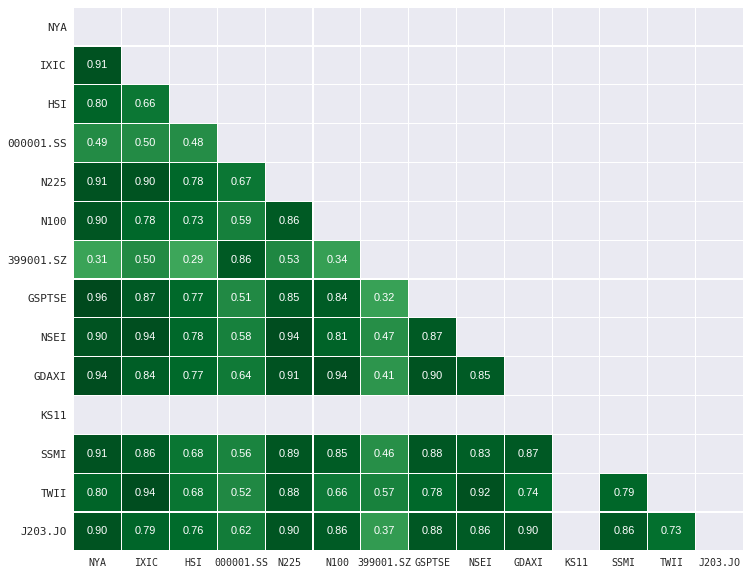

In [17]:
#Generating Heatmap / correlation matrix
import seaborn as sns
corr_map = pd.DataFrame()
df['year']=df['Date'].dt.year
df['Month']=df['Date'].dt.month
for stock in index['Index'].tolist():
    corr_map[stock] = df.query("Index == @stock & year >= 2012")['Close'].reset_index()['Close']

matrix = np.triu(corr_map.corr())
plt.figure(figsize = (12, 10))
sns.heatmap(corr_map.corr(), annot = True, cmap = 'Greens', fmt=".2f", mask = matrix, vmin = -1, vmax = 1, linewidths = 0.1, linecolor = 'white', cbar = False, annot_kws = {'fontsize': 11})
plt.xticks(size = 10, fontname = 'monospace')
plt.yticks(size = 11, fontname = 'monospace')



# Generating  a ARIMA model for forecasting the close prices
(I have leveraged New York Stock Exchange data for this example)

An ARIMA model is characterized by 3 terms p, d, q:
- p is the order of the AR term
- d is the number of differencing required to make the time series stationary
- q is the order of the MA term

ŷt   =   μ + ϕ1 yt-1 +…+ ϕp yt-p - θ1et-1 -…- θqet-q

We need to make the model stationary , in order to remove any multicollinearity, because if they are correlated linear regression will be unstable.

In [18]:
from matplotlib.pylab import rcParams

In [19]:
data_arima=nya.drop(['Open', 'High','Low','Index','Adj Close','Volume','CloseUSD','Region','Exchange','Currency'], axis = 1)

In [20]:
data_arima.head(5)

,Date,Close
0,2010-01-04,7326.740234
1,2010-01-05,7354.870117
2,2010-01-06,7377.700195
3,2010-01-07,7393.930176
4,2010-01-08,7425.350098


In [21]:
from datetime import datetime
indexedDataset=data_arima.set_index(['Date'])

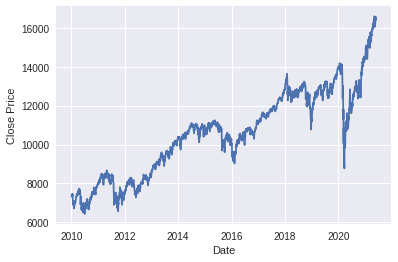

In [22]:
# Plot timeseries for New York Stock Exchange

indexedDataset.head(5)
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.plot(indexedDataset)

## Augumented Dickey Fuller (ADF) test

We'll use the Augumented Dickey Fuller (ADF) test to check if the price series is stationary.

The null hypothesis of the ADF test is that the time series is non-stationary. So, if the p-value of the test is less than the significance level (0.05) then we can reject the null hypothesis and infer that the time series is indeed stationary.

So, in our case, if the p-value > 0.05 we'll need to find the order of differencing.

In [23]:
# We need to perform a adfuller test to check for stationarity

from statsmodels.tsa.stattools import adfuller

result = adfuller(indexedDataset.Close.dropna())
print(f"ADF Statistic: {result[0]}")
print(f"p-value: {result[1]}")

#since p value is > 0.05 it does not reject the null hypothesis i.e This model is not stationary. We need to make this model stationary , to generate a ARIMA model 

ADF Statistic: -0.27861111568507163
p-value: 0.928479485072231


In [24]:
indexedDataset.describe()

,Close
count,2871.000000
mean,10572.406484
std,2208.316904
min,6434.810059
25%,8428.020019
50%,10691.099610
75%,12390.075195
max,16590.429690


## *ACF*


In [25]:
from statsmodels.graphics.tsaplots import plot_acf

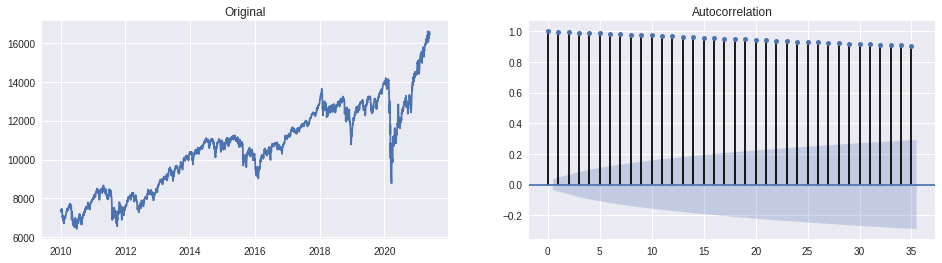

In [26]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 4))

ax1.plot(indexedDataset.Close)
ax1.set_title("Original")
# add ; at the end of the plot function so that the plot is not duplicated
plot_acf(indexedDataset.Close, ax=ax2);

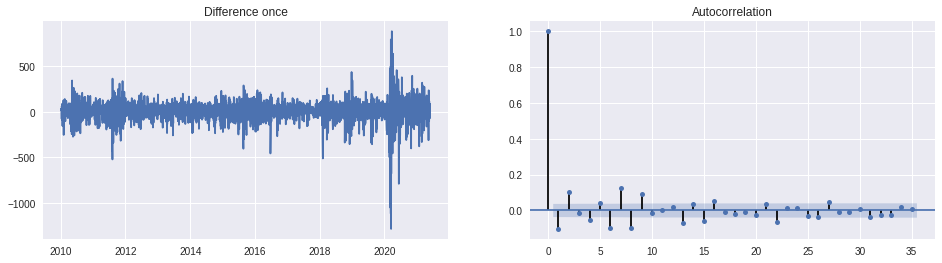

In [27]:
diff = indexedDataset.Close.diff().dropna()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 4))

ax1.plot(diff)
ax1.set_title("Difference once")
plot_acf(diff, ax=ax2);

one differencing is enough, hence d=1

In [28]:
#We can use the pmdarima package to get the number of differencing.
!pip install pmdarima

## PACF

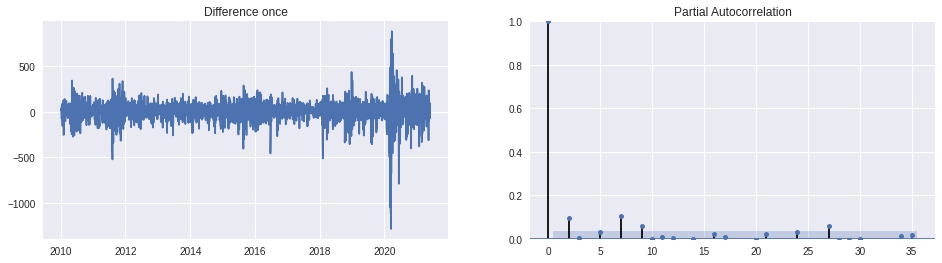

In [29]:
from statsmodels.graphics.tsaplots import plot_pacf
diff = indexedDataset.Close.diff().dropna()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 4))

ax1.plot(diff)
ax1.set_title("Difference once")
ax2.set_ylim(0, 1)
plot_pacf(diff, ax=ax2);

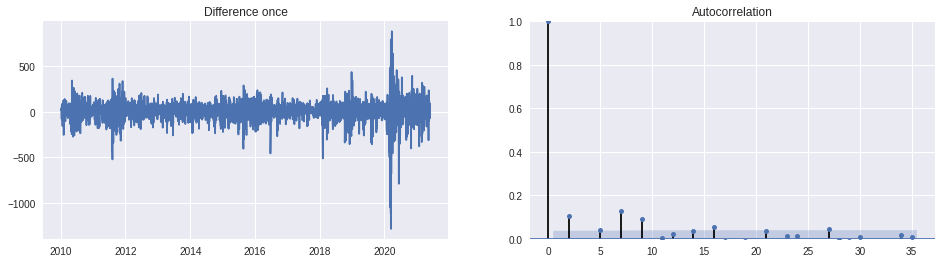

In [30]:
diff = indexedDataset.Close.diff().dropna()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 4))

ax1.plot(diff)
ax1.set_title("Difference once")
ax2.set_ylim(0, 1)
plot_acf(diff, ax=ax2);

## Fit Arima Model

In [31]:
from statsmodels.tsa.arima_model import ARIMA
import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)
# ARIMA Model
model = ARIMA(indexedDataset.Close, order=(3, 1, 3))
result = model.fit(disp=0)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency informa

In [32]:
print(result.summary())

                             ARIMA Model Results                              
Dep. Variable:                D.Close   No. Observations:                 2870
Model:                 ARIMA(3, 1, 3)   Log Likelihood              -17554.479
Method:                       css-mle   S.D. of innovations            109.680
Date:                Mon, 02 Aug 2021   AIC                          35124.958
Time:                        03:31:05   BIC                          35172.655
Sample:                             1   HQIC                         35142.153
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             3.2214      2.049      1.572      0.116      -0.794       7.237
ar.L1.D.Close    -1.4009      0.262     -5.340      0.000      -1.915      -0.887
ar.L2.D.Close    -0.3691      0.449     

(array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 array([-1120.86288772,  -943.34764241,  -765.8323971 ,  -588.3171518 ,
         -410.80190649,  -233.28666118,   -55.77141587,   121.74382944,
          299.25907474,   476.77432005,   654.28956536]),
 <a list of 2870 Lists of Patches objects>)

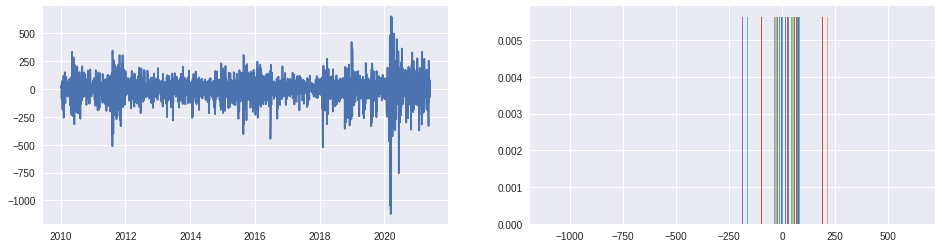

In [33]:
residuals = pd.DataFrame(result.resid)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 4))

ax1.plot(residuals)
ax2.hist(residuals, density=True)

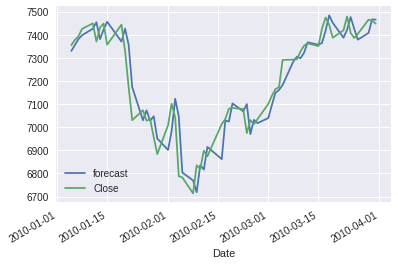

In [34]:
result.plot_predict(
    start=1,
    end=60,
    dynamic=False,
);

# as observed our fitted model closely follows the actual model

In [35]:
n = int(len(indexedDataset) * 0.8)
train = indexedDataset.Close[:n]
test = indexedDataset.Close[n:]

In [36]:
step = 30

model = ARIMA(train, order=(5, 1, 3))
result = model.fit(disp=0)

# Forecast
fc, se, conf = result.forecast(step)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency informa

In [37]:
fc = pd.Series(fc, index=test[:step].index)
lower = pd.Series(conf[:, 0], index=test[:step].index)
upper = pd.Series(conf[:, 1], index=test[:step].index)

In [41]:
train.tail(5)

Date
2019-02-11    12297.90039
2019-02-12    12438.44043
2019-02-13    12474.88965
2019-02-14    12440.21973
2019-02-15    12603.46973
Name: Close, dtype: float64

Date
2019-02-19    12602.365067
2019-02-20    12600.469909
2019-02-21    12583.601807
2019-02-22    12579.501178
2019-02-25    12578.635490
2019-02-26    12565.233847
2019-02-27    12558.329806
2019-02-28    12561.843944
2019-03-01    12554.153420
2019-03-04    12544.659313
2019-03-05    12548.957515
2019-03-06    12547.815442
2019-03-07    12537.516380
2019-03-08    12539.473621
2019-03-11    12543.963607
2019-03-12    12535.566609
2019-03-13    12533.514438
2019-03-14    12541.153887
2019-03-15    12537.125567
2019-03-18    12531.327335
2019-03-19    12538.869266
2019-03-20    12540.404109
2019-03-21    12532.843871
2019-03-22    12537.390539
2019-03-25    12543.884190
2019-03-26    12537.442518
2019-03-27    12537.448207
2019-03-28    12546.662750
2019-03-29    12543.981973
2019-04-01    12539.767014
dtype: float64


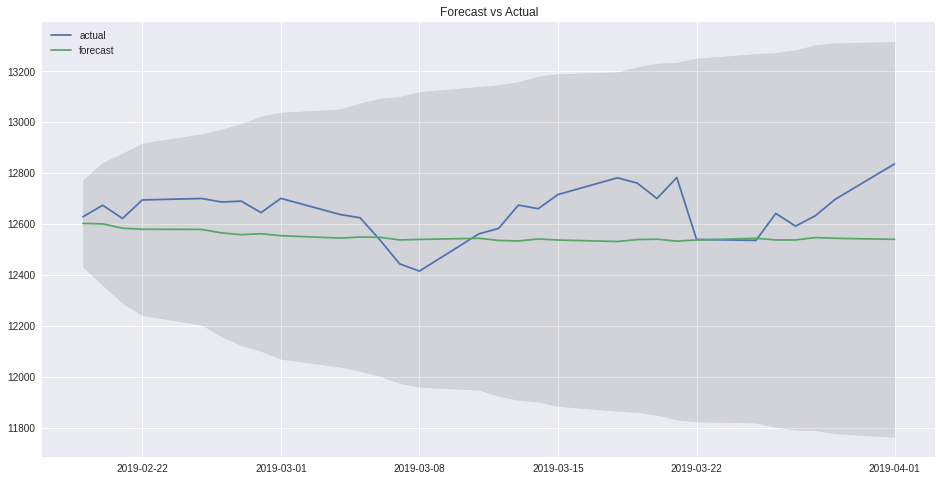

In [40]:
plt.figure(figsize=(16, 8))
plt.plot(test[:step], label="actual")
plt.plot(fc, label="forecast")
plt.fill_between(lower.index, lower, upper, color="k", alpha=0.1)
plt.title("Forecast vs Actual")
plt.legend(loc="upper left")

print(fc) #Predicted Values

In [39]:
# As observed this forecasting model optimally fits the actual values.
